### Implementing a simple chatbot using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

### Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    """
    This class defines the state structure for the conversation graph.
    """
    messages:Annotated[list, add_messages]

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [8]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4", temperature=0)
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'id': 'chatcmpl-CcyocnnDF6dNiU8Rh0HCyCCqpyFRg', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--9b13394f-d155-4b33-8d55-d9953da81b4a-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [10]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="llama-3.3-70b-versatile", temperature=0)   
llm_groq.invoke("Hello")

AIMessage(content='Hello. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.020296211, 'prompt_time': 0.003173511, 'queue_time': 0.162090418, 'total_time': 0.023469722}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_297b22ece7', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--973807b1-0398-404c-ae9e-83ffee1c032a-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

## Now we will start creating our nodes

In [11]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state["messages"])]}

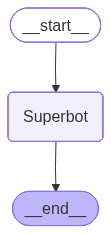

In [13]:
graph = StateGraph(State)

##Node(Adding superbot node)
graph.add_node("Superbot", superbot)

##Edges(Adding edges in the graph)
graph.add_edge(START, "Superbot")
graph.add_edge("Superbot", END)

graph_builder = graph.compile()

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
### Invoking the graph

graph_builder.invoke({"messages" : "Hi, my name is shivang"})

{'messages': [HumanMessage(content='Hi, my name is shivang', additional_kwargs={}, response_metadata={}, id='42e623a7-332f-4eec-9256-bebf96d1bdb1'),
  AIMessage(content="Hello Shivang! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 43, 'total_tokens': 70, 'completion_time': 0.046481883, 'prompt_time': 0.001917024, 'queue_time': 0.055469816, 'total_time': 0.048398907}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_eff2255fd7', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--2ebb2d19-b3fa-4582-859a-bf8363f6df09-0', usage_metadata={'input_tokens': 43, 'output_tokens': 27, 'total_tokens': 70})]}

## Streaming the responses

In [18]:
for event in graph_builder.stream({"messages" : "hi, my name is krish"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='hi, my name is krish', additional_kwargs={}, response_metadata={}, id='9092277c-3ace-4c57-bd57-8b36ddcec155')]}
{'messages': [HumanMessage(content='hi, my name is krish', additional_kwargs={}, response_metadata={}, id='9092277c-3ace-4c57-bd57-8b36ddcec155'), AIMessage(content="Hello Krish! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 42, 'total_tokens': 68, 'completion_time': 0.048726019, 'prompt_time': 0.002320503, 'queue_time': 0.058131737, 'total_time': 0.051046522}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_dae98b5ecb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--bdcc9477-8b8d-49e7-ac50-f0a54d9a2925-0', usage_metadata={'input_tokens': 42, 'output_tokens': 26, 'total_tokens': 68})]}
